In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/digit-recognizer/sample_submission.csv
/kaggle/input/digit-recognizer/train.csv
/kaggle/input/digit-recognizer/test.csv


In [2]:
train= pd.read_csv("/kaggle/input/digit-recognizer/test.csv")
train.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
test= pd.read_csv("/kaggle/input/digit-recognizer/train.csv")
test.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
import matplotlib.pyplot as plt
def show_image(data, images_per_row=5):
    for i in range(len(data)):
        ax=plt.subplot(images_per_row,images_per_row, i+1)
        digit=data[i]
        digit_img= digit.reshape(28,28)
        plt.imshow(digit_img)
        plt.axis("off")

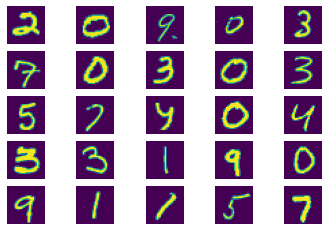

In [5]:
show_image(train[:25].to_numpy(),images_per_row=5)

In [6]:
from sklearn.decomposition import PCA

In [7]:
pca=PCA(random_state=42)

In [8]:
train_reduced= pca.fit(train)

In [9]:
train_reduced.components_

array([[ 5.26389607e-19,  0.00000000e+00,  1.11022302e-16, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 1.23193779e-19,  1.24900090e-16, -0.00000000e+00, ...,
        -0.00000000e+00, -0.00000000e+00, -0.00000000e+00],
       [ 7.33934442e-19,  1.11022302e-16, -1.11022302e-16, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       ...,
       [-0.00000000e+00,  3.81288537e-01,  1.82675116e-01, ...,
        -0.00000000e+00, -0.00000000e+00, -0.00000000e+00],
       [-0.00000000e+00, -4.20552321e-02, -1.42999160e-01, ...,
        -0.00000000e+00, -0.00000000e+00, -0.00000000e+00],
       [-0.00000000e+00, -1.52429291e-01,  9.78570057e-03, ...,
        -0.00000000e+00, -0.00000000e+00, -0.00000000e+00]])

<BarContainer object of 784 artists>

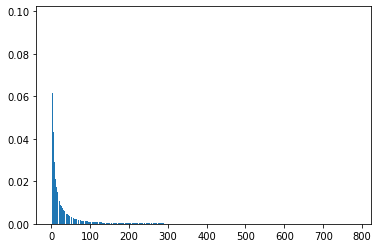

In [10]:
plt.bar(range(1,len(train_reduced.explained_variance_ratio_)+1),train_reduced.explained_variance_ratio_)

In [11]:
evr=train_reduced.explained_variance_ratio_
var_cum= np.cumsum(evr)

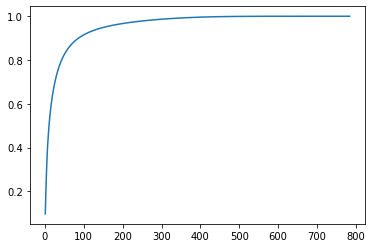

In [12]:
plt.plot(range(1,len(evr)+1),var_cum)

In [13]:
pca2= PCA(0.95)

In [14]:
train_reduced2= pca2.fit_transform(train)

In [15]:
train_reduced2.shape

(28000, 153)